In [2]:
!pip install plotnine

     |████████████████████████████████| 4.7 MB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 1.7 MB/s  eta 0:00:01
     |████████████████████████████████| 111 kB 82.7 MB/s eta 0:00:01
     |████████████████████████████████| 11.2 MB 97.4 MB/s eta 0:00:01
     |████████████████████████████████| 11.7 MB 41.0 MB/s eta 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.4
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3


In [2]:
%pylab inline
import warnings
warnings.filterwarnings("ignore")
#import pickle
from SCCAF import *
import pandas as pd
# from plotnine import *

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Figure S1

## FigS1a

In [2]:
mkdir figdata

In [2]:
ad = sc.read('./Baron2016Human.h5')

In [19]:
ad.layers['counts'] = ad.X
sc.pp.filter_genes(ad, min_cells=3)
sc.pp.normalize_total(ad, target_sum=1e4)
sc.pp.log1p(ad)
ad.raw = ad  # keep full dimension safe
sc.pp.highly_variable_genes(
    ad,
    flavor="seurat_v3",
    n_top_genes=2000,
    layer="counts",
    batch_key="study",
    subset=True
)
sc.tl.pca(ad, svd_solver='arpack', use_highly_variable=True)
sc.pp.neighbors(ad)
sc.tl.umap(ad,random_state=42)

In [20]:
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [5]:
cmap = plt.get_cmap('Set2')

In [6]:
cmap = plt.get_cmap('Set2')
cmap = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

In [7]:
ad.uns['donor_colors'] = cmap

In [22]:
cols =["#00B8C3", "#006091", "#5C89CC" ,"#74A0FF", "#AFE1AF" ,"#005C07" ,"#0BDA51" ,"#B4C424" ,"#53A39D",
 "#FA8072" ,"#FF7F50", "#DE3163", "#FF69B4" ,"#FFDF11" ,"#FFB307" ,"#C77767" ,"#DC143C" ,"#FA5F55",
 "#FF5F1F", "#AA336A", "#F33A6A" ,"#9440F3" ,"#9900B3" ,"#C266D1" ,"#6C00BF", "#A700FF", "#D9C566",
 "#FFB6C1" ,"#FFEA00" ,"#F3CFC6" ,"#DD6091" ,"#7779BF" ,"#FFA388", "#475D4B", "#802600" ,"#9A0F03",
 "#966919" ,"#D2B48C" ,"#F0E68C", "#708090" ,"#A9A9A9", "#231F20"]

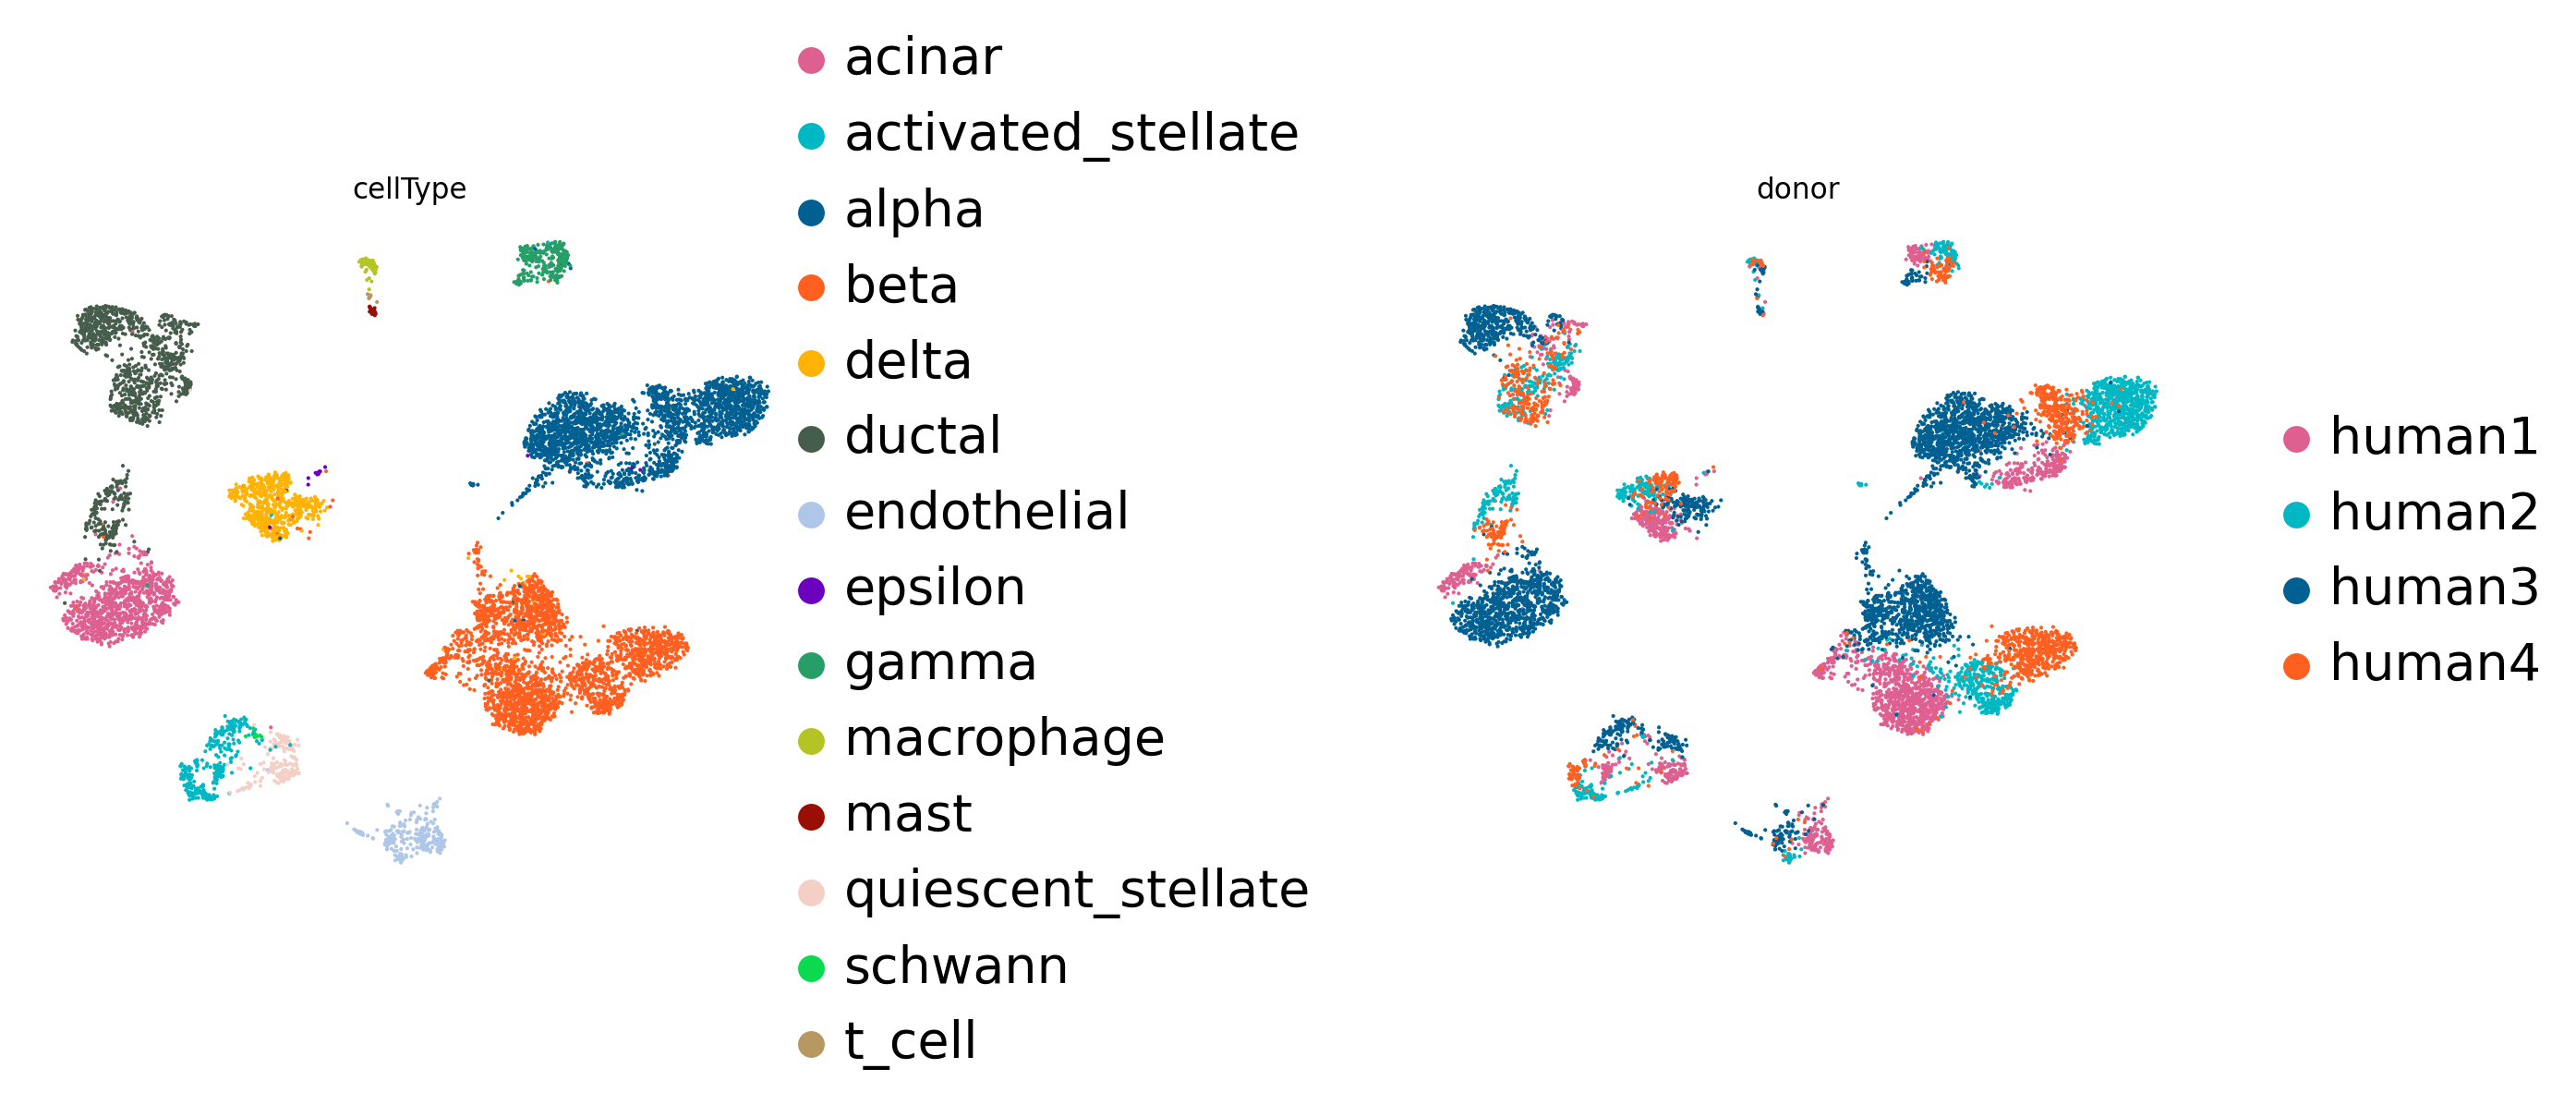

In [11]:
figsize(6,6)
fig=sc.pl.umap(ad, color=['cellType','donor'],frameon=False, palette=cols,wspace=0.6,legend_fontsize=25,return_fig=True)#donor
ax=fig.axes[0]
ax.legend(markerscale=2,loc='right',frameon=False,bbox_to_anchor=(1.7,0.5),fontsize=25)
ax=fig.axes[1]
ax.legend(markerscale=2,loc='right',frameon=False,bbox_to_anchor=(1.5,0.5),fontsize=25)
plt.savefig('figures/FigS1a.pdf',bbox_inches = 'tight')

In [3]:
df = pd.crosstab(ad.obs['cellType'], ad.obs['donor'])

df = df/df.sum()

df['cell'] = df.index

In [4]:
df2 = df.T.iloc[:-1,:]

In [5]:
df2

cellType,acinar,activated_stellate,alpha,beta,delta,ductal,endothelial,epsilon,gamma,macrophage,mast,quiescent_stellate,schwann,t_cell
donor,,,,,,,,,,,,,,
human1,0.056789,0.026329,0.121838,0.450181,0.11048,0.061951,0.067114,0.006711,0.036138,0.007228,0.00413,0.047496,0.002581,0.001033
human2,0.00174,0.046984,0.392111,0.215197,0.072506,0.174594,0.013341,0.00116,0.049884,0.009861,0.00522,0.012761,0.00348,0.00116
human3,0.233842,0.027739,0.313454,0.218308,0.04466,0.1043,0.02552,0.000555,0.009986,0.003883,0.001942,0.014979,0.000277,0.000555
human4,0.001535,0.039908,0.217959,0.379893,0.077513,0.214889,0.005372,0.000767,0.04835,0.007675,0.000767,0.003837,0.000767,0.000767


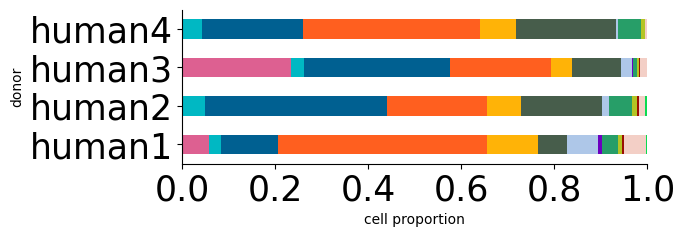

In [9]:
figsize(6,2)
ax = df2.plot(kind='barh', stacked=True,color=cols,fontsize=25)
ax.set_xlim([0,1])
ax.grid(False)
sns.despine()
ax.legend(bbox_to_anchor=(1.05,1), loc="upper left",fontsize=25)
plt.xlabel('cell proportion')
ax.get_legend().remove()
plt.savefig('figures/Fig1a2_legend.pdf',bbox_inches = 'tight')

In [21]:
ad.write('figdata/FigS1a.h5')

In [6]:
ls ../CATD/figdata/FigS1a.h5

../CATD/figdata/FigS1a.h5


## FigS1b

In [8]:
ad = sc.read('./Baron_Segerstolpe.h5')

In [9]:
ad.layers['counts'] = ad.X
sc.pp.filter_genes(ad, min_cells=3)
sc.pp.normalize_total(ad, target_sum=1e4)
sc.pp.log1p(ad)
ad.raw = ad  # keep full dimension safe
sc.pp.highly_variable_genes(
    ad,
    flavor="seurat_v3",
    n_top_genes=2000,
    layer="counts",
    batch_key="sampleID",
    subset=True
)
sc.tl.pca(ad, svd_solver='arpack', use_highly_variable=True)
sc.pp.neighbors(ad)
sc.tl.umap(ad)

In [18]:
cmap = plt.get_cmap('Set2')
cmap = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

In [19]:
ad.uns['study_colors'] = cmap

In [20]:
ad.obs['cellType'] = ad.obs['cellType'].str.replace(' cell','')

In [82]:
ad.uns['cellType_colors'] = default_20

In [ ]:
figsize(6,6)
ax = sc.pl.umap(ad, color=['cellType'],frameon=False, wspace=0.7, palette=cols,title=['cell type'],save='Fig1b_celltype.pdf')+legend(ncol=1)
ax = sc.pl.umap(ad, color=['study'],frameon=False, wspace=0.7, palette=cols,title=['study'],save='Fig1b_study.pdf')

In [41]:
ad.write('figdata/FigS1b.h5')

In [41]:
cols=["#DD6091" ,"#00B8C3", "#006091","#FF5F1F","#FFB307" ,"#475D4B", '#aec7e8' ,"#6C00BF",'#279e68' ,"#B4C424" ,
                    "#9A0F03" , "#F3CFC6", "#0BDA51",'#B79762' ,"#7779BF" ,
                    "#AA336A", "#F33A6A" ,"#9440F3" ,"#9900B3" ,"#C266D1" , "#A700FF", "#D9C566","#FF69B4" ,"#FFDF11",
                    "#FFB6C1" ,"#FFEA00" ,"#F3CFC6"  ,"#FFA388", "#475D4B", "#802600" ,"#9A0F03","#FA5F55",
                    "#966919" ,"#D2B48C" ,"#F0E68C", "#708090" ,"#A9A9A9", "#231F20"] 
                    

In [21]:
ad.obs['cellType'] = ad.obs['cellType'].str.replace(' cell','')

In [22]:
ad.uns['cellType_colors'] = default_20

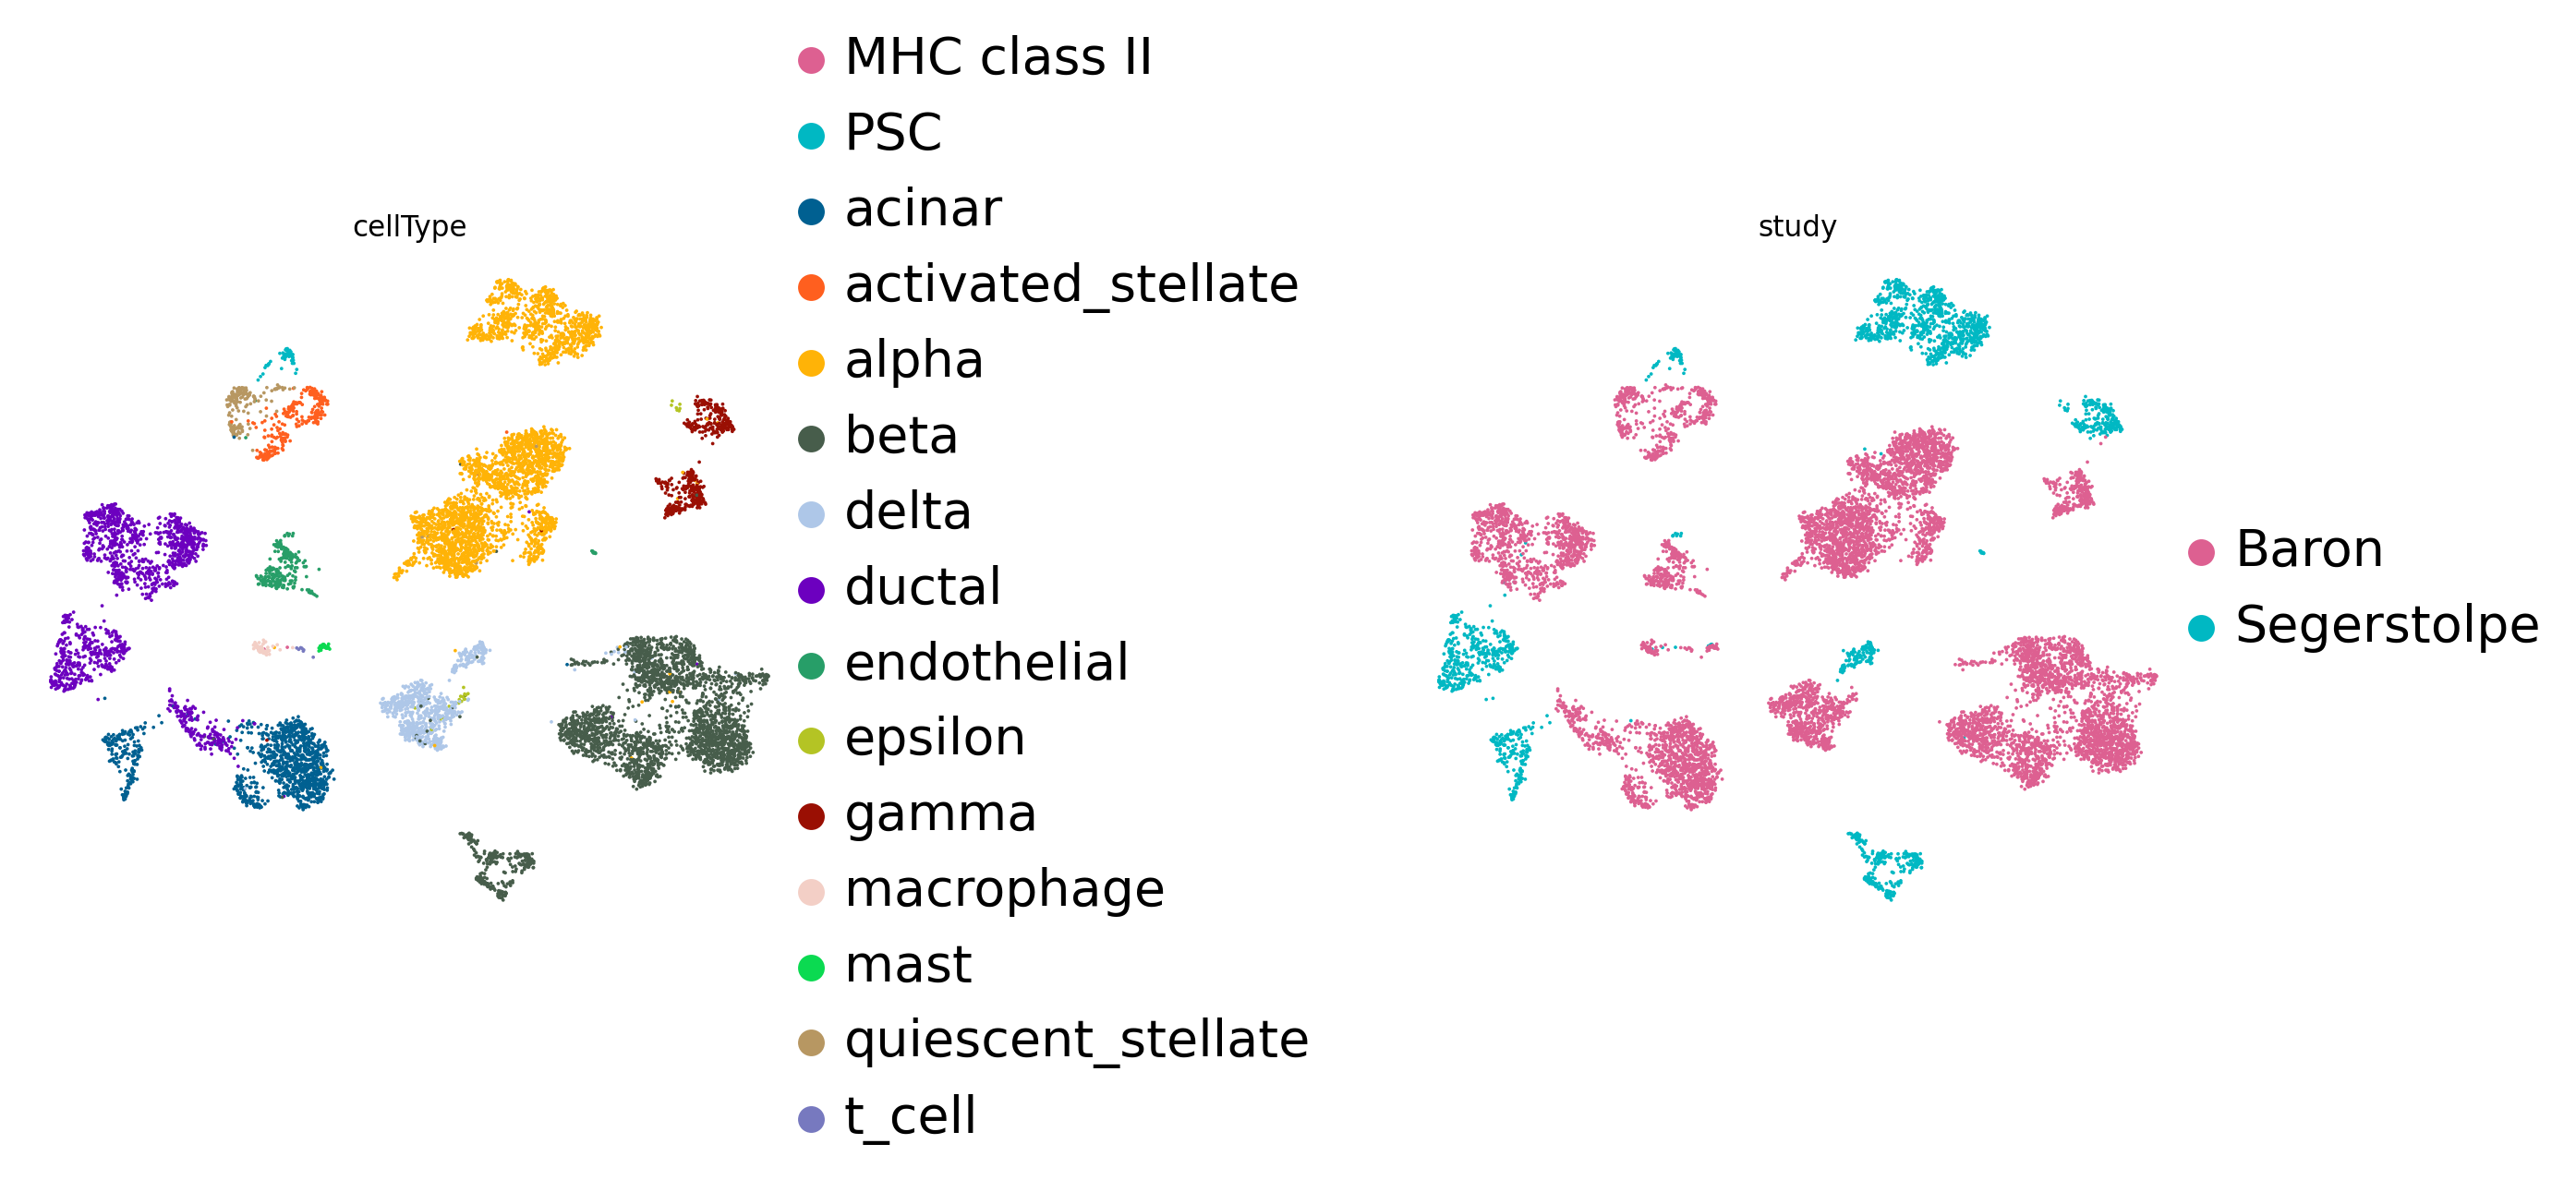

In [24]:
figsize(6,6)
fig=sc.pl.umap(ad, color=['cellType','study'],frameon=False, palette=cols,wspace=0.6,legend_fontsize=25,return_fig=True)#study
ax=fig.axes[0]
ax.legend(markerscale=2,loc='right',frameon=False,bbox_to_anchor=(1.7,0.5),fontsize=25)
ax=fig.axes[1]
ax.legend(markerscale=2,loc='right',frameon=False,bbox_to_anchor=(1.5,0.5),fontsize=25)
plt.savefig('figures/FigS1b.pdf',bbox_inches = 'tight')

In [10]:
df = pd.crosstab(ad.obs['cell3'], ad.obs['study'])

df = df/df.sum()

#df['cell'] = df.index

In [11]:
df

study,Baron,Segerstolpe
cell3,,
acinar,0.139491,0.088889
alpha,0.265175,0.409929
beta,0.298024,0.127187
delta,0.070697,0.056265
duct,0.101881,0.180615
endothelial,0.026541,0.007565
gamma/pp,0.030350,0.097872
macrophage,0.006189,0.002364
stellate,0.052011,0.024113


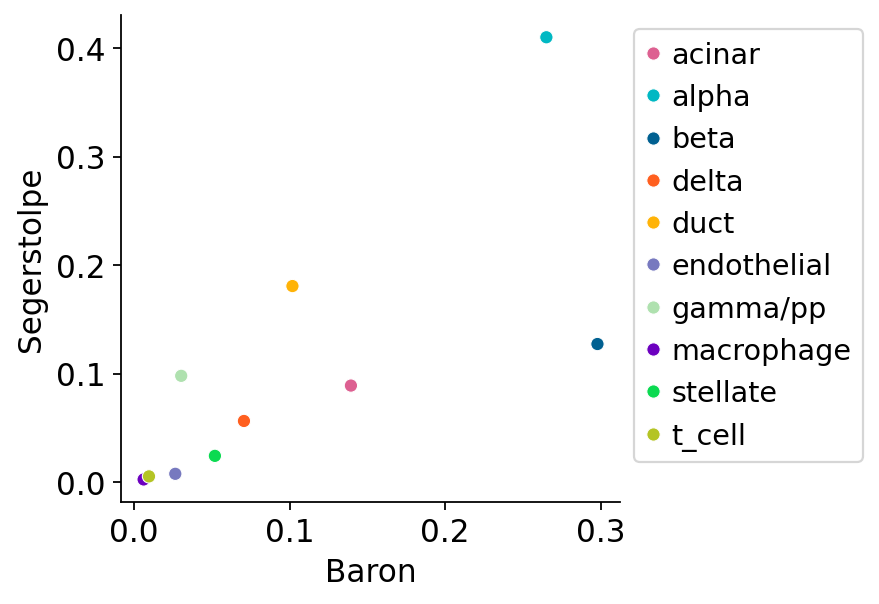

In [50]:
figsize(4,4)
ax = sns.scatterplot(data=df, x="Baron", y="Segerstolpe", hue="cell", palette=ad.uns['cell3_colors'])
sns.despine()
ax.grid(False)
ax.legend(bbox_to_anchor=(1.0,1), loc="upper left")
plt.savefig('FigS1b2.pdf')

In [12]:
df = df.T

In [13]:
df

cell3,acinar,alpha,beta,delta,duct,endothelial,gamma/pp,macrophage,stellate,t_cell
study,,,,,,,,,,
Baron,0.139491,0.265175,0.298024,0.070697,0.101881,0.026541,0.030350,0.006189,0.052011,0.009641
Segerstolpe,0.088889,0.409929,0.127187,0.056265,0.180615,0.007565,0.097872,0.002364,0.024113,0.005201


In [95]:
df.iloc[:2,:2].sum(1)

study
Baron          0.404666
Segerstolpe    0.498818
dtype: float64

In [96]:
df.iloc[:,2].cell

'beta'

In [67]:
df.iloc[:-1,:0].sum(1).tolist()

[0.0, 0.0]

In [68]:
df2 = df.T.iloc[:-1,:]

In [69]:
df2

study,Baron,Segerstolpe,cell
cell3,,,
acinar,0.139491,0.088889,acinar
alpha,0.265175,0.409929,alpha
beta,0.298024,0.127187,beta
delta,0.070697,0.056265,delta
duct,0.101881,0.180615,duct
endothelial,0.026541,0.007565,endothelial
gamma/pp,0.03035,0.097872,gamma/pp
macrophage,0.006189,0.002364,macrophage
stellate,0.052011,0.024113,stellate


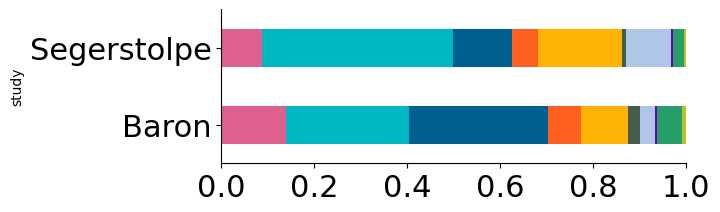

In [17]:
figsize(6,2)
ax = df.plot(kind='barh', stacked=True,color=cols,fontsize=22)
ax.set_xlim([0,1])
ax.grid(False)
sns.despine()
ax.legend(bbox_to_anchor=(1.05,1), loc="upper left",fontsize=22)
# ax.legend(None)
ax.get_legend().remove()
plt.savefig('figures/Fig1b2.pdf',bbox_inches = 'tight')

## FigS1c

In [21]:
df = pd.read_csv('bk_cellportion.csv', index_col=0) 

In [22]:
df2 = df.T

In [23]:
df2 = (df/df.sum()).T

In [24]:
df2.index = df2.index.str.replace('Blood-derived immune-cell mixture from donor ','')

In [29]:
df2

,CD4+ T,Treg,CD8+ T,B,NK,Mono,DC,Neutrophils
12,0.166830,0.005441,0.324736,0.056154,0.153336,0.217978,0.046360,0.029165
10,0.192519,0.009055,0.198232,0.068988,0.077396,0.386547,0.024469,0.042794
9,0.146377,0.009653,0.256643,0.054508,0.129911,0.319668,0.054054,0.029185
7,0.127937,0.008737,0.324061,0.040470,0.175336,0.239707,0.033039,0.050713
6,0.104392,0.011320,0.297034,0.067603,0.108479,0.339377,0.025364,0.046431
5,0.089865,0.008850,0.385693,0.063843,0.094395,0.277708,0.044669,0.034977
4,0.249639,0.010777,0.272414,0.042662,0.128208,0.215865,0.039662,0.040773
2,0.284949,0.015967,0.182894,0.033050,0.125949,0.277021,0.026128,0.054042
1,0.412743,0.019028,0.170055,0.063173,0.073393,0.217571,0.017397,0.026639


In [30]:
df2 = df2[['CD4+ T','CD8+ T','Mono','B','NK','DC','Neutrophils','Treg']]

In [26]:
df2 = df2[['CD4+ T','Treg','CD8+ T','B','NK','Mono','DC','Neutrophils']]

In [27]:
df2 = df2.iloc[[0,3,4,5,6,7,8,1,2], :]

In [28]:
df2 = df2.iloc[::-1,:]

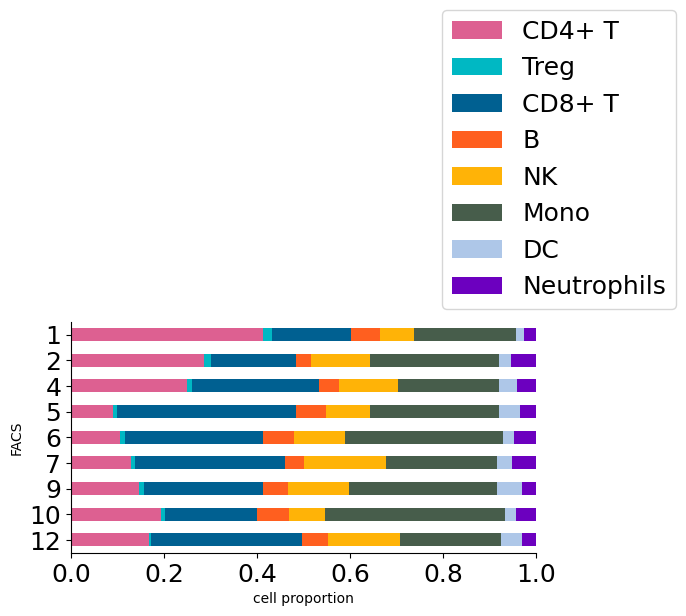

In [32]:
figsize(6,3)
ax = df2.plot(kind='barh', stacked=True,color=cols,fontsize=18)#original 22
ax.set_xlim([0,1])
ax.grid(False)
sns.despine()
ax.legend(bbox_to_anchor=(1.05,1), loc="lower center",fontsize=18)
ax.set_ylabel('FACS')
ax.set_xlabel('cell proportion')
# ax.legend(None)
# ax.get_legend().remove()
plt.savefig('figures/Fig1c1_modify.pdf',bbox_inches = 'tight')

In [46]:
df = pd.read_csv('sc_cellportion_lee_normal.csv', index_col=0) 

In [47]:
df.drop(df.columns[-1], axis=1, inplace=True)

In [48]:
df

,Lee_Normal 1,Lee_Normal 2,Lee_Normal 3,Lee_Normal 4
CD8+ T cell,1230.0,246,369,137
B cell,806.0,390,400,350
NK cell,649.0,957,607,1379
CD4+ T cell,571.0,928,659,380
CD14+ Monocyte,359.0,1064,997,1255
Other T,291.0,244,256,72
CD16+ Monocyte,132.0,404,351,237
cDC,35.0,105,116,53
Platelet,9.0,27,97,16
Plasmablast,7.0,5,11,10


In [49]:
df3 = (df/df.sum()).T

In [50]:
df3

,CD8+ T cell,B cell,NK cell,CD4+ T cell,CD14+ Monocyte,Other T,CD16+ Monocyte,cDC,Platelet,Plasmablast,pDC,RBC,HSPC
Lee_Normal 1,0.300146,0.196681,0.158370,0.139336,0.087604,0.071010,0.032211,0.008541,0.002196,0.001708,0.001220,0.000976,0.000000
Lee_Normal 2,0.055998,0.088778,0.217847,0.211245,0.242204,0.055543,0.091964,0.023902,0.006146,0.001138,0.004325,0.000455,0.000455
Lee_Normal 3,0.094761,0.102722,0.155881,0.169235,0.256035,0.065742,0.090139,0.029789,0.024910,0.002825,0.006934,0.000514,0.000514
Lee_Normal 4,0.035012,0.089445,0.352415,0.097112,0.320726,0.018400,0.060567,0.013545,0.004089,0.002556,0.004600,0.001278,0.000256


In [51]:
df3.columns

Index(['CD8+ T cell', 'B cell', 'NK cell', 'CD4+ T cell', 'CD14+ Monocyte',
       'Other T', 'CD16+ Monocyte', 'cDC', 'Platelet', 'Plasmablast', 'pDC',
       'RBC', 'HSPC'],
      dtype='object')

In [52]:
df3 = df3[[ 'HSPC','CD4+ T cell','CD8+ T cell','Other T','NK cell','B cell','Plasmablast','CD14+ Monocyte','CD16+ Monocyte','cDC','pDC','Platelet','RBC']]

In [56]:
df3

,HSPC,CD4+ T cell,CD8+ T cell,Other T,NK cell,B cell,Plasmablast,CD14+ Monocyte,CD16+ Monocyte,cDC,pDC,Platelet,RBC
Lee_Normal 4,0.000256,0.097112,0.035012,0.018400,0.352415,0.089445,0.002556,0.320726,0.060567,0.013545,0.004600,0.004089,0.001278
Lee_Normal 3,0.000514,0.169235,0.094761,0.065742,0.155881,0.102722,0.002825,0.256035,0.090139,0.029789,0.006934,0.024910,0.000514
Lee_Normal 2,0.000455,0.211245,0.055998,0.055543,0.217847,0.088778,0.001138,0.242204,0.091964,0.023902,0.004325,0.006146,0.000455
Lee_Normal 1,0.000000,0.139336,0.300146,0.071010,0.158370,0.196681,0.001708,0.087604,0.032211,0.008541,0.001220,0.002196,0.000976


In [55]:
df3 = df3.iloc[::-1,:]

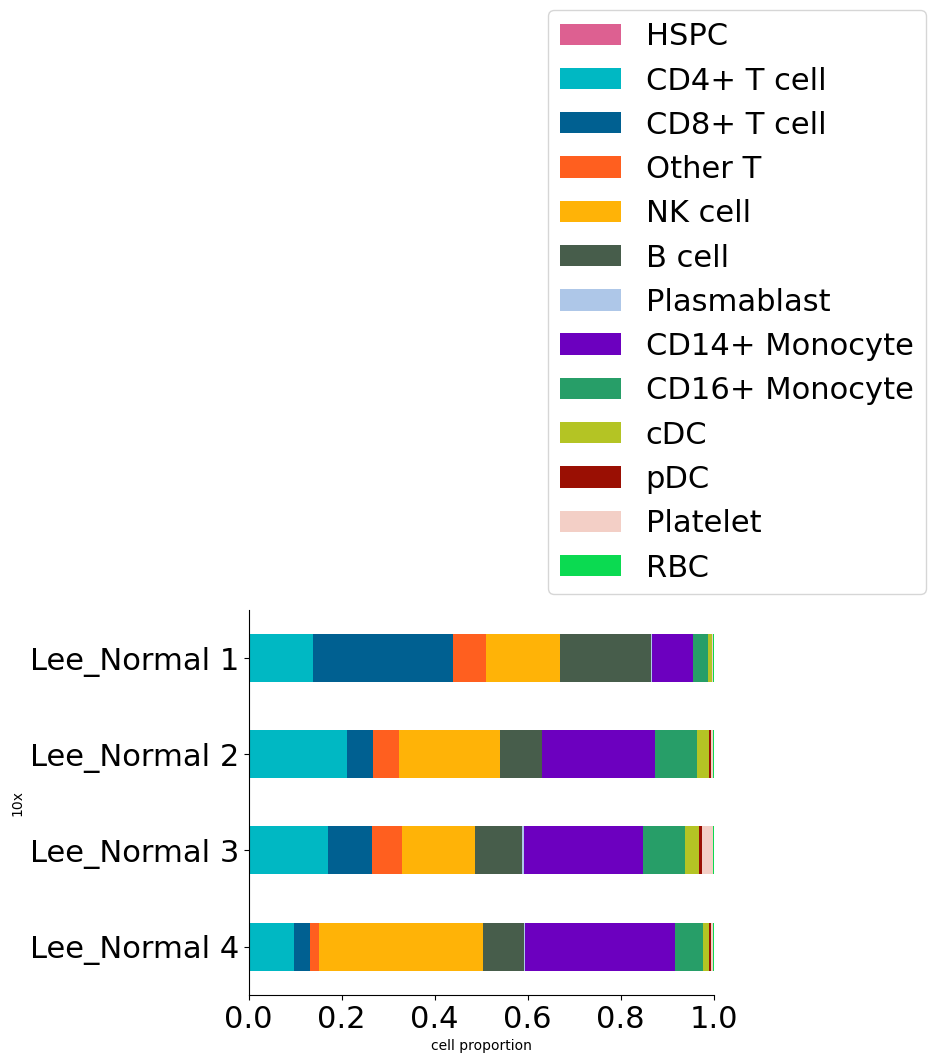

In [57]:
figsize(6,5)
ax = df3.plot(kind='barh', stacked=True,color=cols,fontsize=22)
ax.set_xlim([0,1])
ax.grid(False)
sns.despine()
ax.set_ylabel('10x')
ax.set_xlabel('cell proportion')
ax.legend(bbox_to_anchor=(1.05,1), loc="lower center",fontsize=22)
# ax.legend(None)
plt.savefig('figures/Fig1c2_modify_lee.pdf',bbox_inches = 'tight')

## Fig S3

In [36]:
ls deconv_benchmark/test.csv

deconv_benchmark/test.csv


In [46]:
df = pd.read_csv('deconv_benchmark/test.csv', index_col=0)

In [47]:
df['size'] = df['name'].str.split('.').str.len()
df['name1'] = df['name'].str[4:-4]

df['NormTrans'] = df['name1'].str.split('.').str[-1]
df['method'] = df['name1'].str.split('.').str[-4]
df['marker_strategy'] = df['name1'].str.split('.').str[-5]
df['normalization'] = df['name1'].str.split('.').str[-6]
df['deconv_type'] = df['name1'].str.split('.').str[-7]
df['transformation'] = df['name1'].str.split('.').str[-8]
df['pbmode'] = df['name1'].str.split('.').str[-9]
df['propsample'] = df['name1'].str.split('.').str[-10]
df['sampleCT'] = df['name1'].str.split('.').str[-11]
df['number_cells'] = df['name1'].str.split('.').str[-12]
df['data'] = df['name1'].str.split('.').str[:-12].str.join('.')
df['sim'] = df['data'].str.contains('type_batch')
df['rds'] = df['name'].str.split('.').str[1:-9].str.join('.')


In [48]:
df = df[df['number_cells']=='10000']

df = df[df['sim']==False]

df = df[df['sampleCT']=='F']

df = df[df['size']==16]

df = df[df['normalization']=='TMM']

In [58]:
df = df[df['pbmode']=='2']

In [61]:
df

,RMSE,mRMSE,Pearson,mPearson,name,size,name1,NormTrans,method,marker_strategy,normalization,deconv_type,transformation,pbmode,propsample,sampleCT,number_cells,data,sim,rds
2292,3203.6158,3203.575010,-0.0054,0.001009,t.p.Adams2020.10000.F.T.2.none.bulk.TMM.all.CD...,16,Adams2020.10000.F.T.2.none.bulk.TMM.all.CDSeq....,T,CDSeq,all,TMM,bulk,none,2,T,F,10000,Adams2020,False,p.Adams2020.10000.F.T.2
2293,2926.1052,2926.068287,0.0968,0.096783,t.p.Adams2020.10000.F.T.2.none.bulk.TMM.all.DC...,16,Adams2020.10000.F.T.2.none.bulk.TMM.all.DCQ.no...,T,DCQ,all,TMM,bulk,none,2,T,F,10000,Adams2020,False,p.Adams2020.10000.F.T.2
2294,3204.3277,3204.287068,0.6719,0.671923,t.p.Adams2020.10000.F.T.2.none.bulk.TMM.all.de...,16,Adams2020.10000.F.T.2.none.bulk.TMM.all.deconf...,T,deconf,all,TMM,bulk,none,2,T,F,10000,Adams2020,False,p.Adams2020.10000.F.T.2
2295,2925.9569,2925.920020,0.9355,0.935475,t.p.Adams2020.10000.F.T.2.none.bulk.TMM.all.De...,16,Adams2020.10000.F.T.2.none.bulk.TMM.all.DeconR...,T,DeconRNASeq,all,TMM,bulk,none,2,T,F,10000,Adams2020,False,p.Adams2020.10000.F.T.2
2296,3204.4647,3204.424051,0.1037,0.103737,t.p.Adams2020.10000.F.T.2.none.bulk.TMM.all.DS...,16,Adams2020.10000.F.T.2.none.bulk.TMM.all.DSA.no...,T,DSA,all,TMM,bulk,none,2,T,F,10000,Adams2020,False,p.Adams2020.10000.F.T.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24354,848.9223,848.899320,0.7323,0.724649,t.p.ZilionisMouse2019fine.10000.F.T.2.none.sc....,16,ZilionisMouse2019fine.10000.F.T.2.none.sc.TMM....,T,BisqueRNA,TMM,TMM,sc,none,2,T,F,10000,ZilionisMouse2019fine,False,p.ZilionisMouse2019fine.10000.F.T.2
24355,848.9624,848.939443,0.1528,0.139010,t.p.ZilionisMouse2019fine.10000.F.T.2.none.sc....,16,ZilionisMouse2019fine.10000.F.T.2.none.sc.TMM....,T,CPM,TMM,TMM,sc,none,2,T,F,10000,ZilionisMouse2019fine,False,p.ZilionisMouse2019fine.10000.F.T.2
24356,848.9039,848.880878,0.9849,0.984910,t.p.ZilionisMouse2019fine.10000.F.T.2.none.sc....,16,ZilionisMouse2019fine.10000.F.T.2.none.sc.TMM....,T,MuSiC,TMM,TMM,sc,none,2,T,F,10000,ZilionisMouse2019fine,False,p.ZilionisMouse2019fine.10000.F.T.2
24357,848.9194,848.896397,0.8840,0.883982,t.p.ZilionisMouse2019fine.10000.F.T.2.none.sc....,16,ZilionisMouse2019fine.10000.F.T.2.none.sc.TMM....,T,SCDC,TMM,TMM,sc,none,2,T,F,10000,ZilionisMouse2019fine,False,p.ZilionisMouse2019fine.10000.F.T.2


In [69]:
df['1/RMSE'] = 1.0/df['RMSE']

In [85]:
ds = df['data'].value_counts()
ds = ds[ds>21]

In [87]:
df = df[df['data'].isin(ds.index)]

In [99]:
df['method']=df['method'].astype('category')

In [108]:
df['method']=df['method'].cat.reorder_categories(['FARDEEP', 'MuSiC','nnls','RLR','EpiDISH',\
                                                   'OLS', 'EPIC',   \
                                                  'elasticNet', 'lasso','proportionsInAdmixture','ridge',\
                                                  'CIBERSORT','SCDC','BisqueRNA', 'CDSeq',  'CPM', 'DCQ', 'DSA', 'DeconRNASeq',
        'TIMER',
       'deconf', 'dtangle',  'ssFrobenius', 'ssKL'])

In [114]:
df['Pearson'] = df['Pearson'].astype(float)

In [100]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

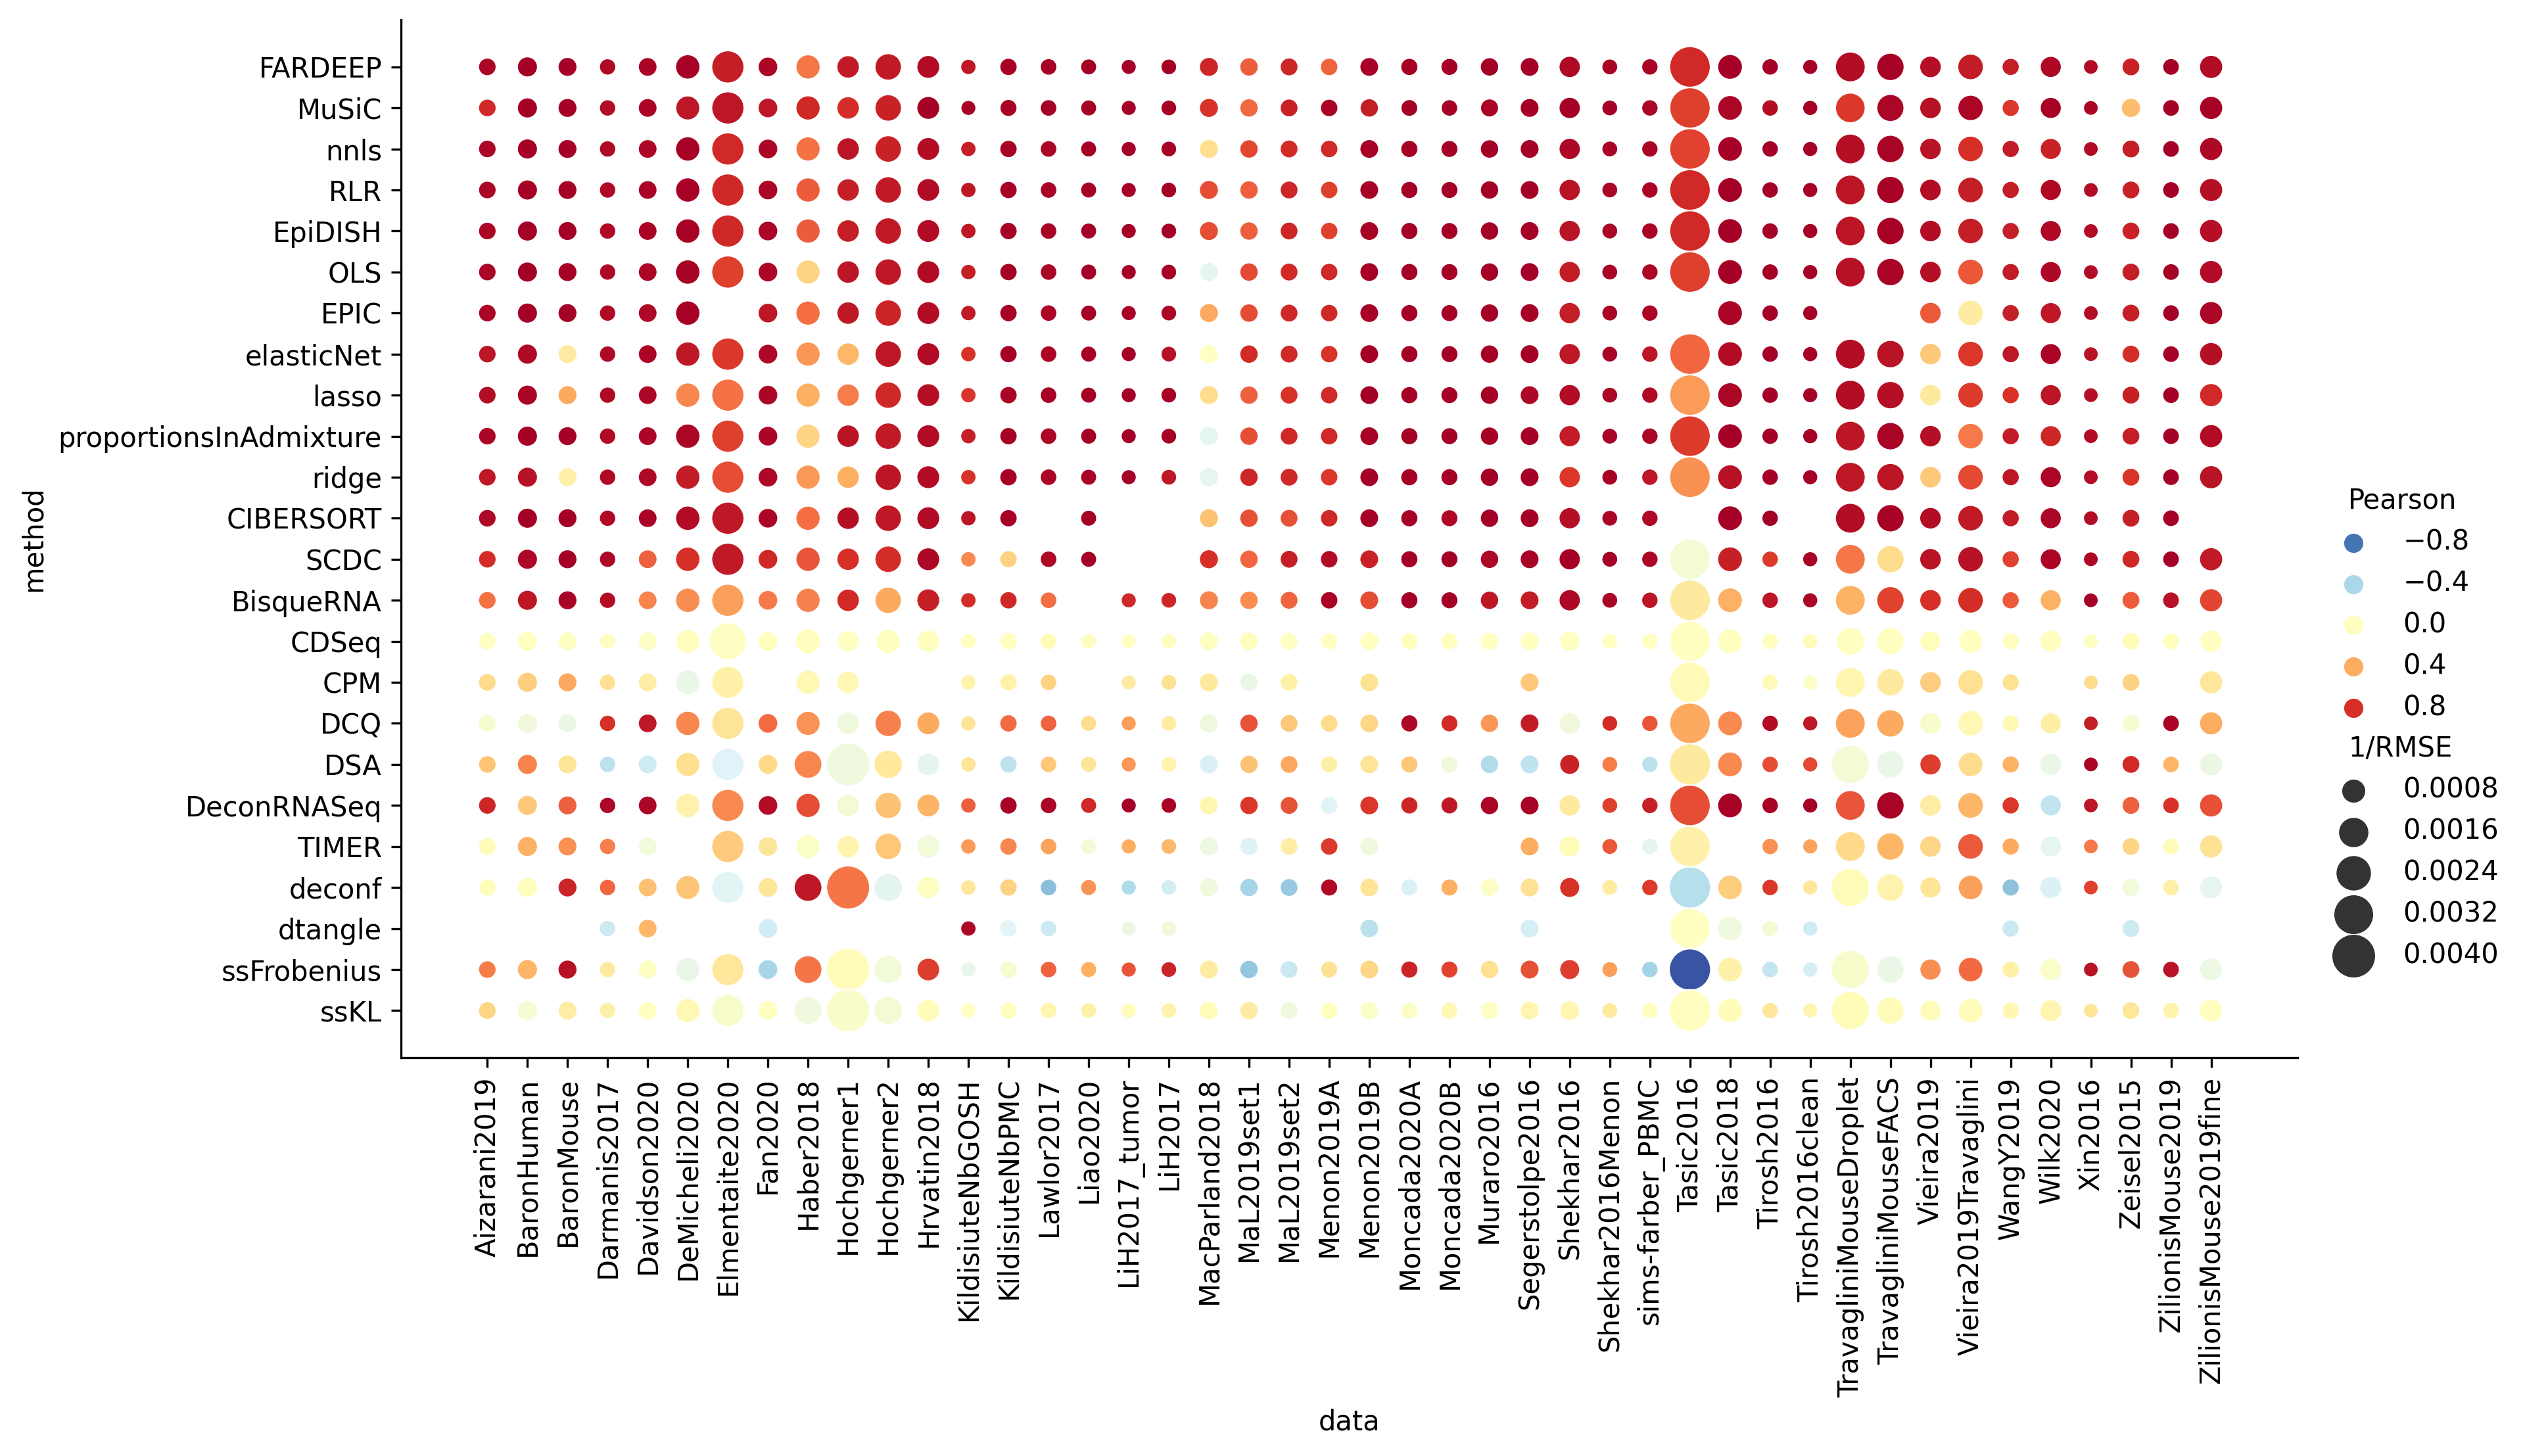

In [115]:
ax = sns.relplot(data = df, x = 'data', y='method', size = '1/RMSE', hue='Pearson', hue_norm=(-1, 1),\
            height=6, aspect=2, sizes=(30, 250), palette='RdYlBu_r')
ax.set_xticklabels(rotation=90)
# plt.savefig('figdata/FigS3.pdf')